In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
path = "../processed/train/evaluated/paraphrase_humarin_samples_62_EVALUATED_27_11_23.csv"
df = pd.read_csv(path)

In [3]:
df.columns

Index(['id', 'title', 'media-type', 'source', 'content', 'word-count',
       'content-to-sample', 'published', 'kgw-watermarked', 'kthl-watermarked',
       'non-watermarked', 'pp-kthl-1', 'pp-kgw-1', 'pp-unwatermarked-1',
       'pp-kthl-2', 'pp-kgw-2', 'pp-unwatermarked-2', 'pp-kthl-3', 'pp-kgw-3',
       'pp-unwatermarked-3', 'kgw-wm-zscore', 'non-wm-zscore',
       'kgw-wm-pp-zscore-1', 'non-wm-pp-zscore-1', 'kgw-wm-pp-zscore-2',
       'non-wm-pp-zscore-2', 'kgw-wm-pp-zscore-3', 'non-wm-pp-zscore-3'],
      dtype='object')

In [4]:
z_threshold = 4.0
# Need to binary classify the results 

In [5]:
base_wmark_df = df[["kgw-watermarked", "kgw-wm-zscore"]].copy()
base_wmark_df["watermarked"] = [True for _ in range(len(base_wmark_df))]
base_wmark_df = base_wmark_df.rename(columns={"kgw-watermarked": "text", "kgw-wm-zscore": "z-score"})

non_wmark_df = df[["non-watermarked", "non-wm-zscore"]].copy()
non_wmark_df["watermarked"] = [False for _ in range(len(non_wmark_df))]
non_wmark_df = non_wmark_df.rename(columns={"non-watermarked": "text", "non-wm-zscore": "z-score"})

In [6]:
bc_df = pd.concat([base_wmark_df, non_wmark_df])
bc_df['watermark-detected'] = bc_df.apply(lambda x: x['z-score'] > z_threshold, axis=1)

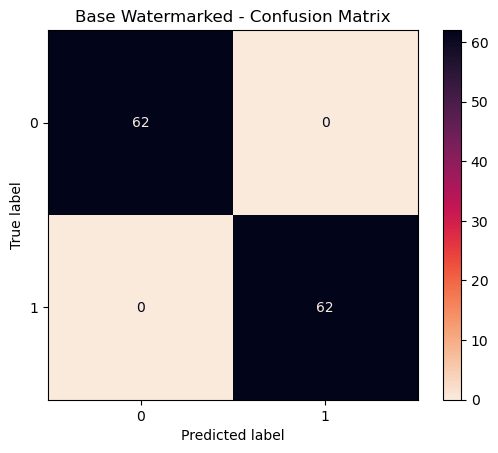

In [47]:
cf = confusion_matrix(bc_df["watermarked"], bc_df["watermark-detected"])
disp = ConfusionMatrixDisplay(confusion_matrix=cf)
disp.plot(cmap=sns.color_palette("rocket_r", as_cmap=True), colorbar=True)
plt.title(f"Base Watermarked - Confusion Matrix")
plt.savefig(image_output_path+f"base_watermarked.png")
plt.show()

In [7]:
def gen_paraphrase_df(full_df, pp_iter = 1, z_threshold = 4.0):
    wmark_df = full_df[[f"pp-kgw-{pp_iter}", f"kgw-wm-pp-zscore-{pp_iter}"]]
    wmark_df = wmark_df.rename(columns={f"pp-kgw-{pp_iter}": "text", f"kgw-wm-pp-zscore-{pp_iter}": "z-score"})
    wmark_df["watermarked"] = [True for _ in range(len(wmark_df))]
    
    nwmark_df = full_df[[f"pp-unwatermarked-{pp_iter}", f"non-wm-pp-zscore-{pp_iter}"]]
    nwmark_df = nwmark_df.rename(columns={f"pp-unwatermarked-{pp_iter}": "text", f"non-wm-pp-zscore-{pp_iter}": "z-score"})
    nwmark_df["watermarked"] = [False for _ in range(len(nwmark_df))]
    
    bc_df = pd.concat([wmark_df, nwmark_df])
    bc_df["watermark-detected"] = bc_df.apply(lambda x: x['z-score'] > z_threshold, axis=1)
    return bc_df

In [15]:
image_output_path = "../results/images/confusion_matrices/"

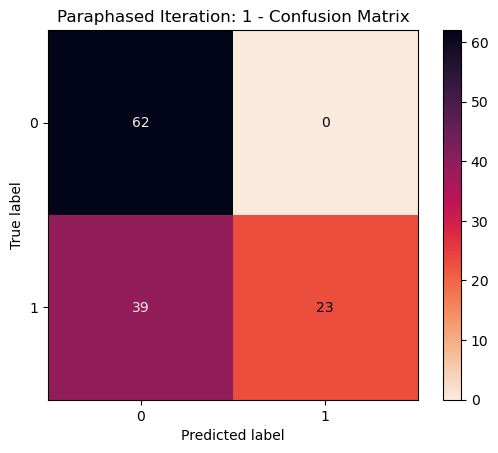

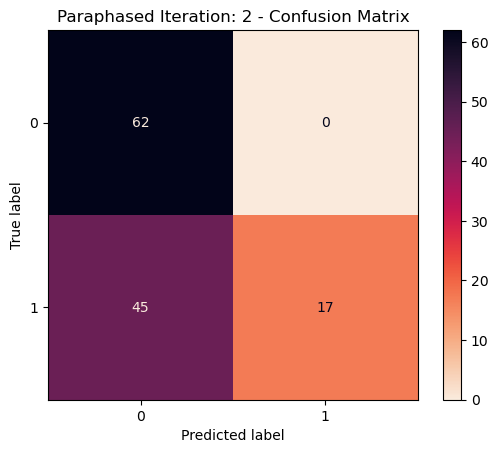

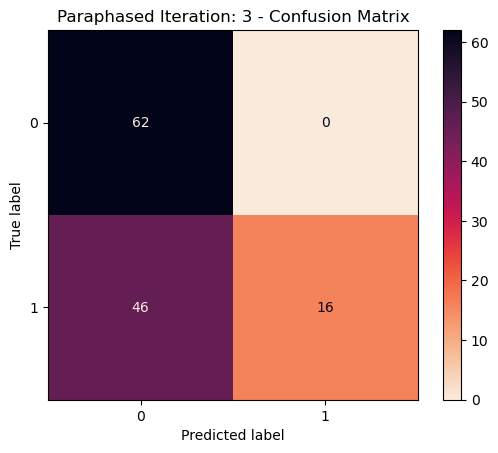

In [46]:
for i in range(1,4):
    pp_bc_df = gen_paraphrase_df(df, pp_iter=i)
    cf = confusion_matrix(pp_bc_df["watermarked"], pp_bc_df["watermark-detected"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cf)
    disp.plot(cmap=sns.color_palette("rocket_r", as_cmap=True), colorbar=True)
    plt.title(f"Paraphased Iteration: {i} - Confusion Matrix")
    plt.savefig(image_output_path+f"iteration_{i}.png")
    plt.show()